# i. Introduction

## Milestone II

---

**Nama:** Rajib Kurniawan  

**Batch:** FTDS-HCK 032

**Background:**
Peningkatan jumlah pengajuan pinjaman pada lembaga keuangan dan fintech saat ini menuntut adanya sistem yang dapat membantu proses pengambilan keputusan kredit secara lebih cepat dan objektif. Setiap pengajuan pinjaman harus melalui analisis kelayakan agar lembaga tidak mengalami risiko gagal bayar (default). Oleh karena itu, diperlukan model machine learning yang dapat memprediksi apakah calon peminjam layak mendapatkan persetujuan pinjaman atau tidak, berdasarkan atribut-atribut seperti pendapatan, status pernikahan, pekerjaan, jumlah pinjaman, dan sebagainya.

**Objective:**
Tujuan dari project ini adalah membangun model klasifikasi yang dapat memprediksi _*kelayakan pengajuan pinjaman loan approval*_ berdasarkan data historis nasabah. 

Model ini diharapkan dapat membantu:
- Mempercepat proses evaluasi pengajuan pinjaman.
- Mengurangi risiko kredit macet dengan memprediksi kemungkinan approval.
- Memberikan insight terkait faktor-faktor utama yang memengaruhi keputusan persetujuan pinjaman.

Dataset Description
Dataset yang digunakan berisi data historis pengajuan pinjaman (loan_data.csv) yang mencakup atribut-atribut seperti:

- Numerical features : pendapatan, jumlah pinjaman, durasi pinjaman, rasio utang, dll.
- Categorical features: jenis pekerjaan, status pernikahan, kepemilikan rumah, dan sebagainya.
- Target column: status pinjaman (loan_status) yang menunjukkan apakah pengajuan pinjaman disetujui atau tidak.

Metode yang Digunakan
Proyek ini menggunakan pendekatan supervised learning dengan berbagai algoritma klasifikasi, yaitu:

- Decision Tree
- Random Forest
- K-Nearest Neighbors (KNN)
- Support Vector Machine (SVM)
- XGBoost


---

# ii. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")

# iii. Data Loading

In [2]:
# Load dataset
data = pd.read_csv("loan_data.csv")

# Melihat 5 baris pertama
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
# cek ukuran dataset
print("Dataset (loan_data.csv):", data.shape)

Dataset (loan_data.csv): (45000, 14)


In [4]:
# Informasi dataset
print("\nInformasi kolom:")
data.info()


Informasi kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_

In [5]:
# Mengecek missing values
print("\nJumlah missing values tiap kolom:")
print(data.isna().sum())


Jumlah missing values tiap kolom:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [6]:
# Mengecek distribusi data
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [7]:
data.duplicated().sum()

0

In [8]:
# Rename kolom menjadi lebih mudah dimengerti
data = data.rename(
    columns={
        "person_age": "Age",
        "person_gender": "Gender",
        "person_education": "Education_Level",
        "person_income": "Income",
        "person_emp_exp": "Experience_Years",
        "person_home_ownership": "Home_Status",
        "loan_amnt": "Loan_Amount",
        "loan_intent": "Loan_Purpose",
        "loan_int_rate": "Loan_Interest_Rate",
        "loan_percent_income": "Loan_to_Income_Ratio",
        "cb_person_cred_hist_length": "Credit_History_Length",
        "credit_score": "Credit_Score",
        "previous_loan_defaults_on_file": "Default_On_Payment",
        "loan_status": "Loan_Status",
    }
)

data

,Age,Gender,Education_Level,Income,Experience_Years,Home_Status,Loan_Amount,Loan_Purpose,Loan_Interest_Rate,Loan_to_Income_Ratio,Credit_History_Length,Credit_Score,Default_On_Payment,Loan_Status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


# iv. Exploratory Data Analysis (EDA)

Pada tahap ini dilakukan eksplorasi awal terhadap dataset untuk memahami distribusi fitur, serta hubungan antar variabel atau column terhadap target (*loan_status*).  
Langkah-langkah yang dilakukan meliputi:

1. Melihat distribusi target.
2. Rata-rata Pendapatan per Status Pinjaman
3. Usia Pemohon berdasarkan Status Pinjaman
4. Status Kepemilikan Rumah dan Status Pinjaman
5. Hubungan Antara Rasio Pinjaman terhadap Pendapatan
6. Lama Pekerjaan dengan Status Pinjaman
7. Hubungan Riwayat GagaL Bayar dengan Status Pinjaman
8. Hubungan Skor Kredit dengan Status Pinjaman

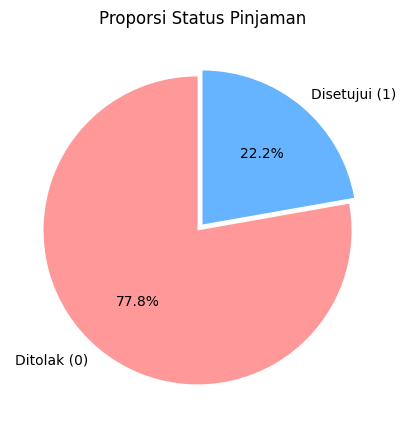

Loan_Status
0    77.777778
1    22.222222
Name: proportion, dtype: float64

In [9]:
# 1. Distribusi Target (Loan_Status) 


plt.figure(figsize=(5, 5))
labels = ["Ditolak (0)", "Disetujui (1)"]
sizes = data["Loan_Status"].value_counts()
colors = ["#ff9999", "#66b3ff"]
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    explode=(0.05, 0),
)
plt.title("Proporsi Status Pinjaman")
plt.show()

# Proporsi target
data["Loan_Status"].value_counts(normalize=True) * 100

Dari pie chart di atas terlihat rasio antara pinjaman yang disetujui dan ditolak. Proporsinya dapat membantu mengetahui apakah data seimbang (balanced) atau tidak seimbang (imbalanced). mungkin dikarenakan tidak lembaga pemberi pinjaman memiliki kebijakan konservatif dalam menyetujui pinjaman, yang umumnya dipengaruhi oleh faktor-faktor seperti pendapatan rendah, skor kredit rendah, dan rasio pinjaman terhadap pendapatan yang tinggi.

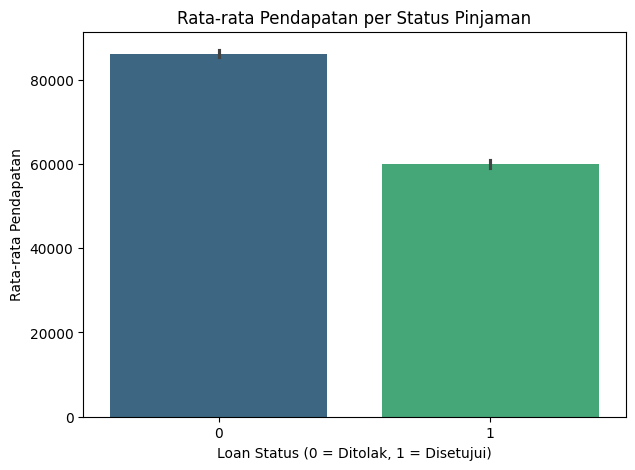

In [10]:
# 2. Rata-rata Pendapatan per Status Pinjaman

plt.figure(figsize=(7, 5))
sns.barplot(data=data, x="Loan_Status", y="Income", palette="viridis", estimator="mean")
plt.title("Rata-rata Pendapatan per Status Pinjaman")
plt.xlabel("Loan Status (0 = Ditolak, 1 = Disetujui)")
plt.ylabel("Rata-rata Pendapatan")
plt.show()

Rata-rata pendapatan pemohon yang tidak disetujui lebih tinggi dibanding yang disetujui. Hal ini menegaskan bahwa income Pemohon berisiko tidak mampu mencicil adalah faktor penting dalam kelayakan pinjaman.

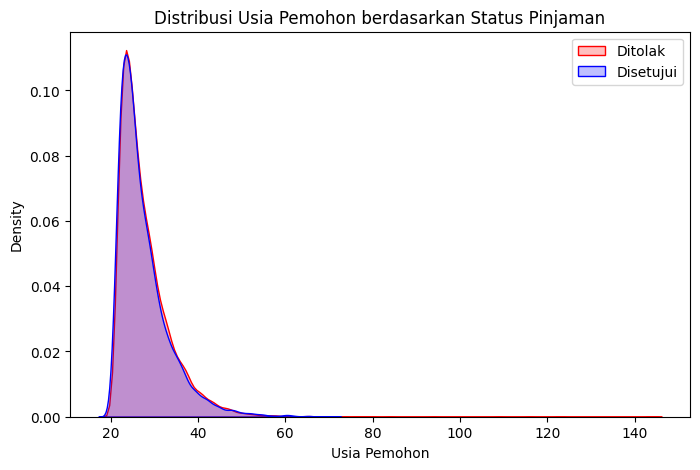

In [11]:
# 3. Usia Pemohon berdasarkan Status Pinjaman

plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=data[data["Loan_Status"] == 0]["Age"], label="Ditolak", shade=True, color="red")
sns.kdeplot(
    data=data[data["Loan_Status"] == 1]["Age"],
    label="Disetujui",
    shade=True,
    color="blue",)
plt.title("Distribusi Usia Pemohon berdasarkan Status Pinjaman")
plt.xlabel("Usia Pemohon")
plt.legend()
plt.show()

Pemohon dengan usia antara 21–35 tahun tampak memiliki peluang lebih tinggi disetujui dibanding usia lebih muda. Distribusi ini membantu memahami profil umur tipikal peminjam yang berhasil.

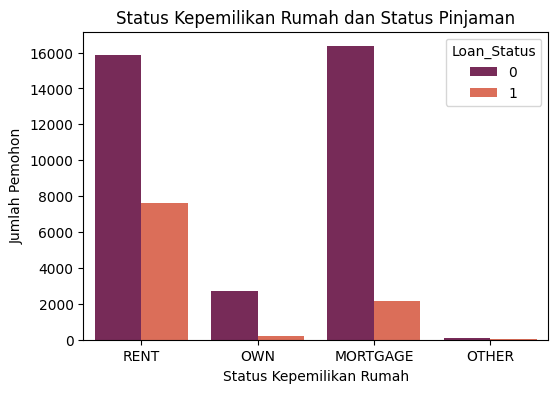

In [12]:
# 4. Status Kepemilikan Rumah dan Status Pinjaman

plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="Home_Status", hue="Loan_Status", palette="rocket")
plt.title("Status Kepemilikan Rumah dan Status Pinjaman")
plt.xlabel("Status Kepemilikan Rumah")
plt.ylabel("Jumlah Pemohon")
plt.show()

Pemohon yang memiliki rumah sendiri (OWN atau MORTGAGE) lebih sering disetujui dibandingkan penyewa (RENT). Kepemilikan aset fisik memperkuat kepercayaan nantinya ke lembaga kredit. dan dari hasil visualisasi diatas masih banyak yang tidak disetujui pembiayaan dikarenakan beberapa faktor yang kurang mendukung untuk pengajuan kredit.

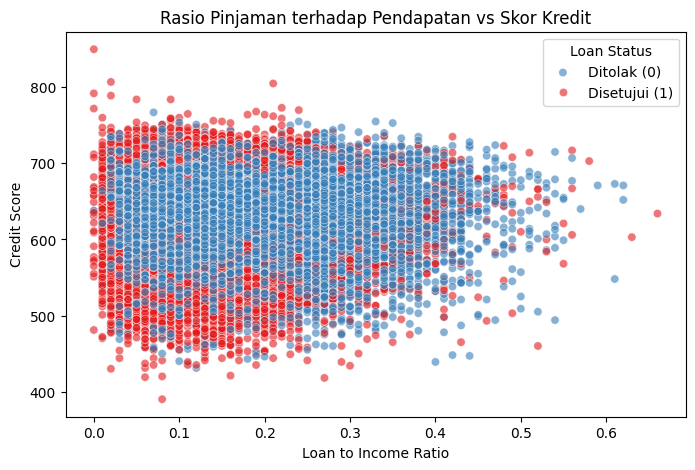

In [13]:
# 5.Hubungan Antara Rasio Pinjaman terhadap Pendapatan

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=data,
    x="Loan_to_Income_Ratio",
    y="Credit_Score",
    hue="Loan_Status",
    palette="Set1",
    alpha=0.6,
)
plt.title("Rasio Pinjaman terhadap Pendapatan vs Skor Kredit")
plt.xlabel("Loan to Income Ratio")
plt.ylabel("Credit Score")
plt.legend(title="Loan Status", labels=["Ditolak (0)", "Disetujui (1)"])
plt.show()

Pemohon dengan rasio pinjaman terhadap pendapatan yang rendah (<0.1) dan skor kredit tinggi lebih sering disetujui. Grafik ini memperlihatkan interaksi antara dua fitur numerik terhadap target. jadi semakin besar pinjaman bisa saja salah satu faktor penolakan.

In [14]:
# 6. Lama Pekerjaan dengan Status Pinjaman

# Kategorisasi berdasarkan pengalaman
def categorize_experience(years):
    if years <= 2:
        return "Entry Level"
    elif years <= 5:
        return "Junior"
    elif years <= 10:
        return "Senior"
    elif years <= 20:
        return "Expert"
    else:
        return "Veteran"


data["Experience_Category"] = data["Experience_Years"].apply(categorize_experience)

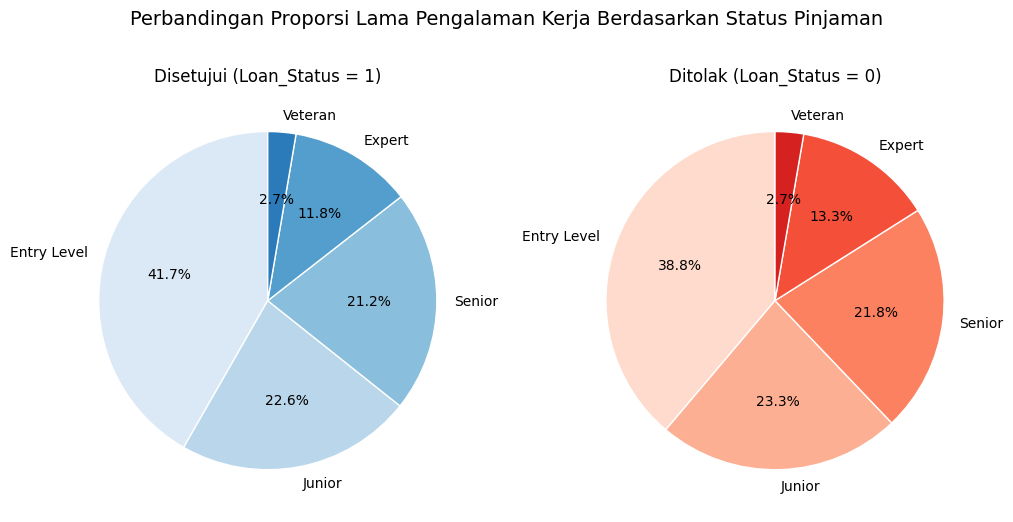

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Pie chart untuk yang Disetujui
approved = (
    data[data["Loan_Status"] == 1]["Experience_Category"].value_counts(normalize=True)
    * 100
)
axes[0].pie(
    approved,
    labels=approved.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("Blues"),
    wedgeprops={"edgecolor": "white"},
)
axes[0].set_title("Disetujui (Loan_Status = 1)")

# Pie chart untuk yang Ditolak
rejected = (
    data[data["Loan_Status"] == 0]["Experience_Category"].value_counts(normalize=True)
    * 100
)
axes[1].pie(
    rejected,
    labels=rejected.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("Reds"),
    wedgeprops={"edgecolor": "white"},
)
axes[1].set_title("Ditolak (Loan_Status = 0)")

plt.suptitle(
    "Perbandingan Proporsi Lama Pengalaman Kerja Berdasarkan Status Pinjaman",
    fontsize=14,
)
plt.show()

Berdasarkan hasil analisis, lama pengalaman kerja tidak menunjukkan perbedaan proporsi yang signifikan antara pemohon yang disetujui dan ditolak. Hal ini mengindikasikan bahwa faktor lain seperti skor kredit, pendapatan, dan rasio pinjaman terhadap pendapatan memiliki pengaruh yang lebih besar terhadap keputusan persetujuan pinjaman.

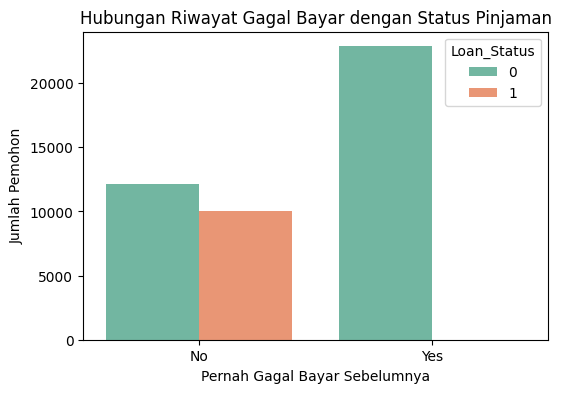

In [16]:
# 7. Hubungan Riwayat GagaL Bayar dengan Status Pinjaman

plt.figure(figsize=(6,4))
sns.countplot(data=data, x="Default_On_Payment", hue="Loan_Status", palette="Set2")
plt.title("Hubungan Riwayat Gagal Bayar dengan Status Pinjaman")
plt.xlabel("Pernah Gagal Bayar Sebelumnya")
plt.ylabel("Jumlah Pemohon")
plt.show()

Pemohon yang memiliki riwayat gagal bayar sebelumnya (Yes) jauh lebih sering ditolak. karena ini logis karena catatan buruk di masa lalu mungkin ada kendala macet atau gagal bayar yang berbulan akan memengaruhi kepercayaan lembaga keuangan.

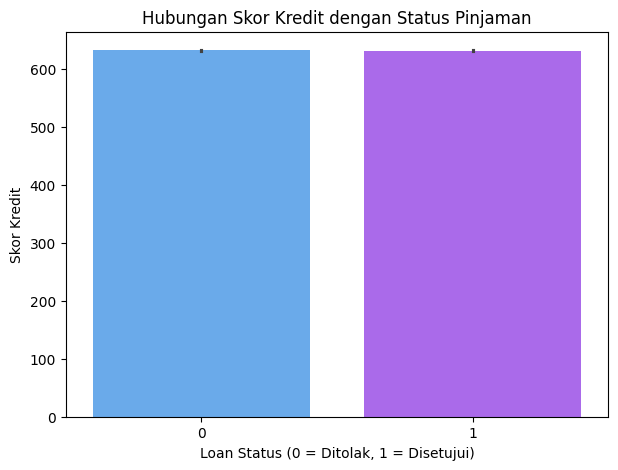

In [17]:
# 8. Hubungan Skor Kredit dengan Status Pinjaman

plt.figure(figsize=(7, 5))
sns.barplot(data=data, x="Loan_Status", y="Credit_Score", palette="cool")
plt.title("Hubungan Skor Kredit dengan Status Pinjaman")
plt.xlabel("Loan Status (0 = Ditolak, 1 = Disetujui)")
plt.ylabel("Skor Kredit")
plt.show()

Pemohon dengan skor kredit tinggi hampir selalu memiliki peluang disetujui lebih besar. Ini adalah salah satu variabel paling penting dalam analisis risiko kredit. dan mungkin ada yang kredit skor tinggi tetapi ada faktor yang lain kurang mendukung jadi disini antara status Ditoal dan Disetujui tidak jauh beda.

# v. Feature Engineering

### Split Data

In [18]:
# Pisahkan fitur dan target
X = data.drop(columns=["Loan_Status"])
y = data["Loan_Status"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Distribusi Loan_Status di train:", y_train.value_counts(normalize=True))

Train shape: (36000, 14)
Test shape: (9000, 14)
Distribusi Loan_Status di train: Loan_Status
0    0.777778
1    0.222222
Name: proportion, dtype: float64


Dataset dibagi menjadi 77% data training dan 22% data testing dengan stratified split agar proporsi target (Loan_Status) tetap seimbang di kedua set. Ini penting untuk menjaga distribusi kelas “Disetujui” dan “Ditolak” agar tidak bias pada model saat evaluasi nanti.

Insight: Data sudah representatif dan model akan belajar pola dari data training dengan distribusi yang sama seperti dunia nyata.

### Cardinality

In [19]:
cat_cols = X_train.select_dtypes(include="object").columns
for col in cat_cols:
    print(
        f"{col} = {X_train[col].nunique()} unique values: {X_train[col].unique()[:5]}"
    )

Gender = 2 unique values: ['male' 'female']
Education_Level = 5 unique values: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
Home_Status = 4 unique values: ['OWN' 'RENT' 'MORTGAGE' 'OTHER']
Loan_Purpose = 6 unique values: ['VENTURE' 'MEDICAL' 'PERSONAL' 'HOMEIMPROVEMENT' 'DEBTCONSOLIDATION']
Default_On_Payment = 2 unique values: ['Yes' 'No']
Experience_Category = 5 unique values: ['Entry Level' 'Senior' 'Junior' 'Expert' 'Veteran']


disini untuk memastikan tidak ada kolom dengan cardinality terlalu tinggi (misal ID unik atau teks panjang). jadi seluruh kolom kategorikal masih dalam batas wajar (seperti Gender, Home_Status, Loan_Purpose), sehingga aman untuk di-encode.

### Handling Outlier

In [20]:
num_cols = X_train.select_dtypes(include=["float64", "int64"]).columns

for col in num_cols:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Clipping outlier
    X_train[col] = np.clip(X_train[col], lower, upper)
    X_test[col] = np.clip(X_test[col], lower, upper)

Metode IQR (Interquartile Range) digunakan untuk melakukan clipping pada nilai ekstrem di fitur numerik. Contohnya seperti: pendapatan, jumlah pinjaman, dan skor kredit yang jauh di luar rentang normal “dipotong” agar tidak mendistorsi model.
jadi langkah yang dilakukan ini membantu meningkatkan stability dan generalization model, terutama pada algoritma.

### Handling Missing Value

In [21]:
print("Jumlah missing values Data Clean:")
print(X_train.isnull().sum())   

Jumlah missing values Data Clean:
Age                      0
Gender                   0
Education_Level          0
Income                   0
Experience_Years         0
Home_Status              0
Loan_Amount              0
Loan_Purpose             0
Loan_Interest_Rate       0
Loan_to_Income_Ratio     0
Credit_History_Length    0
Credit_Score             0
Default_On_Payment       0
Experience_Category      0
dtype: int64


Semua kolom sudah bebas dari missing values dikarena dataset yang awalnya sudah tidak ada missing atau sudah clean dan lengkap (45000 non-null).
Dataset sudah bersih (non-null), tapi ada kemungkinan jadi tetap menyiapkan strategi imputasi agar pipeline tetap robust terhadap data real di masa depan (misal data baru yang belum lengkap).

### Encoding 

In [22]:
# Salin data hasil feature engineering sebelumnya
data_encoded = data.copy()

# Daftar kolom kategorikal
num_cols = [
    "Credit_Score",
    "Loan_Interest_Rate",
    "Loan_Amount",
    "Income",
    "Loan_to_Income_Ratio",
    "Age",
    "Experience_Years",
    "Credit_History_Length",
]

cat_cols = [
    "Gender",
    "Education_Level",
    "Home_Status",
    "Loan_Purpose",
    "Default_On_Payment",
]

# Konversi semua kolom kategorikal menjadi kategori numerik (Ordinal)
for col in cat_cols:
    data_encoded[col] = data_encoded[col].astype("category").cat.codes

# Pastikan target tetap numerik
data_encoded["Loan_Status"] = data_encoded["Loan_Status"].astype(int)

# Cek hasil akhir
print("Tipe data setelah encoding:\n")
print(data_encoded.dtypes)
print("\nContoh data:")
print(data_encoded.head())

Tipe data setelah encoding:

Age                      float64
Gender                      int8
Education_Level             int8
Income                   float64
Experience_Years           int64
Home_Status                 int8
Loan_Amount              float64
Loan_Purpose                int8
Loan_Interest_Rate       float64
Loan_to_Income_Ratio     float64
Credit_History_Length    float64
Credit_Score               int64
Default_On_Payment          int8
Loan_Status                int32
Experience_Category       object
dtype: object

Contoh data:
    Age  Gender  Education_Level   Income  Experience_Years  Home_Status  \
0  22.0       0                4  71948.0                 0            3   
1  21.0       0                3  12282.0                 0            2   
2  25.0       0                3  12438.0                 3            0   
3  23.0       0                1  79753.0                 0            3   
4  24.0       1                4  66135.0                 1         

Semua fitur kategorikal (Gender, Education_Level, Home_Status, dll.) diubah menjadi nilai numerik dengan metode Ordinal Encoding. ini penting karena algoritma seperti Logistic Regression dan Random Forest hanya bisa membaca angka, bukan string. dan encoding dilakukan dengan cara yang efisien (tanpa one-hot expansion), menjaga jumlah kolom tetap ringkas dan mempercepat proses training.

### Scaling 

In [23]:
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Feature Selection 

In [24]:
X_train_fs = X_train_scaled.copy()
X_train_fs = X_train_fs.apply(
    lambda x: x.cat.codes if x.dtype.name == "category" else x
)

Seluruh fitur numerik seperti Credit_Score, Loan_Amount, Income, dll. distandarkan menggunakan StandardScaler (Z-score normalization).

Top 10 Feature Importance:


,Feature,Importance
12,Default_On_Payment,0.227627
9,Loan_to_Income_Ratio,0.164410
8,Loan_Interest_Rate,0.159996
3,Income,0.121485
5,Home_Status,0.062982
6,Loan_Amount,0.059332
11,Credit_Score,0.057098
7,Loan_Purpose,0.034691
0,Age,0.027657
10,Credit_History_Length,0.024861


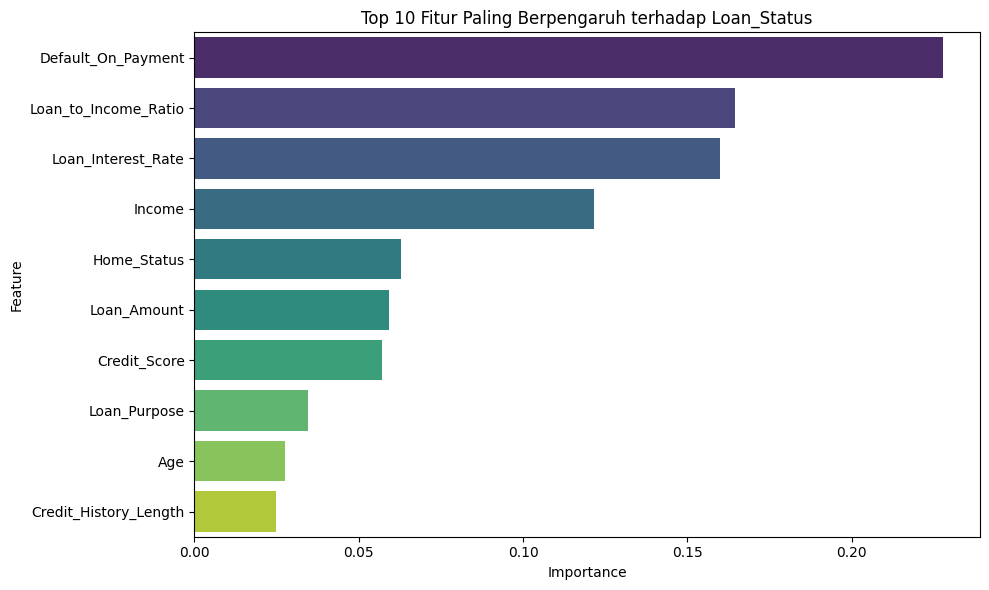

In [25]:
# Salin hasil scaling
X_train_fs = X_train.copy()
X_test_fs = X_test.copy()

# Konversi kategori menjadi numerik sementara
for col in X_train_fs.columns:
    if X_train_fs[col].dtype.name == "category" or X_train_fs[col].dtype == "object":
        X_train_fs[col] = X_train_fs[col].astype("category").cat.codes
        X_test_fs[col] = X_test_fs[col].astype("category").cat.codes

# Latih Random Forest di data training
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_fs, y_train)

# Buat DataFrame feature importance
feature_importance = pd.DataFrame(
    {"Feature": X_train_fs.columns, "Importance": rf_model.feature_importances_}
).sort_values(by="Importance", ascending=False)

# Tampilkan hasil
print("Top 10 Feature Importance:")
display(feature_importance.head(10))

# Visualisasi 10 fitur teratas
plt.figure(figsize=(10, 6))
sns.barplot(
    data=feature_importance.head(10), x="Importance", y="Feature", palette="viridis"
)
plt.title("Top 10 Fitur Paling Berpengaruh terhadap Loan_Status")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Feuture Importance ini mengonfirmasi dari visualisasi bahwa keputusan persetujuan pinjaman sangat bergantung pada kelayakan finansial seperti :

- default on payment, 
- Loan to Income Ratio (range pinjaman terhadap pendapatan income)
- Loan_Interest_Rate (suka bunga peminjam)
- Income (pendapatan)
- rasio pinjaman 

jadi point diatas yang merupakan faktor paling signifikan dalam menentukan keputusan persetujuan pinjaman. Hal ini menunjukkan bahwa sistem secara kuat menilai riwayat kredit dan rasio keuangan pemohon untuk meminimalkan risiko gagal bayar. Sementara itu, faktor demografis seperti usia dan status kepemilikan rumah memiliki pengaruh yang relatif kecil terhadap keputusan akhir model.


### Feuture Transform

In [26]:
# Menentukan kolom numerik & kategorikal dari X_train yang sudah dibersihkan
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

# Pipeline untuk fitur numerik
numeric_pipeline = Pipeline(
    [("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

# Pipeline untuk fitur kategorikal
categorical_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OrdinalEncoder()),
    ]
)

# Gabungkan keduanya dalam ColumnTransformer
transformer = ColumnTransformer(
    [("num", numeric_pipeline, num_cols), ("cat", categorical_pipeline, cat_cols)],
    remainder="drop",
)  # biarkan hanya kolom yang diproses yang masuk ke model

Numerical columns: ['Age', 'Income', 'Experience_Years', 'Loan_Amount', 'Loan_Interest_Rate', 'Loan_to_Income_Ratio', 'Credit_History_Length', 'Credit_Score']
Categorical columns: ['Gender', 'Education_Level', 'Home_Status', 'Loan_Purpose', 'Default_On_Payment', 'Experience_Category']


Pipeline ini menjamin konsistensi antara proses training dan testing setiap tahap preprocessing dilakukan dengan parameter yang sama.

# vi. Model Defenition

In [27]:
# Pipeline untuk Decision Tree
pipe_dt = Pipeline(
    [
        ("transformer", transformer),
        ("classifier", DecisionTreeClassifier(random_state=42)),
    ]
)

# Pipeline untuk Random Forest
pipe_rf = Pipeline(
    [
        ("transformer", transformer),
        ("classifier", RandomForestClassifier(random_state=42)),
    ]
)

# Pipeline untuk XGBoost
pipe_xgb = Pipeline(
    [
        ("transformer", transformer),
        (
            "classifier",
            XGBClassifier(
                random_state=42, use_label_encoder=False, eval_metric="logloss"
            ),
        ),
    ]
)

# Pipeline untuk K-Nearest Neighbors
pipe_knn = Pipeline(
    [("transformer", transformer), ("classifier", KNeighborsClassifier())]
)

# Pipeline untuk Support Vector Machine (SVM)
pipe_svm = Pipeline(
    [
        ("transformer", transformer),
        ("classifier", SVC(probability=True, random_state=42)),
    ]
)

### Base Model Traning

##### Decision Tree Classifier

In [28]:
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Income',
                                                   'Experience_Years',
                                                   'Loan_Amount',
                                                   'Loan_Interest_Rate',
                                                   'Loan_to_Income_Ratio',
                                                   'Credit_History_Length',
                                                   'Credit_Score']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Gender', 'Education_Level',
                                                   'Home_Status',
                                                   'Loan_Purpose',
                                                   'Default_On_Payment',
                                                   'Experience_Category'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

##### Random Forest Classifier

In [29]:
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Income',
                                                   'Experience_Years',
                                                   'Loan_Amount',
                                                   'Loan_Interest_Rate',
                                                   'Loan_to_Income_Ratio',
                                                   'Credit_History_Length',
                                                   'Credit_Score']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Gender', 'Education_Level',
                                                   'Home_Status',
                                                   'Loan_Purpose',
                                                   'Default_On_Payment',
                                                   'Experience_Category'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

##### XGBoost Classifier

In [30]:
pipe_xgb.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Income',
                                                   'Experience_Years',
                                                   'Loan_Amount',
                                                   'Loan_Interest_Rate',
                                                   'Loan_to_Income_Ratio',
                                                   'Credit_History_Length',
                                                   'Credit_Score']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strateg...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

##### Support Vector Machine (SVM)

In [31]:
pipe_svm.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Income',
                                                   'Experience_Years',
                                                   'Loan_Amount',
                                                   'Loan_Interest_Rate',
                                                   'Loan_to_Income_Ratio',
                                                   'Credit_History_Length',
                                                   'Credit_Score']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Gender', 'Education_Level',
                                                   'Home_Status',
                                                   'Loan_Purpose',
                                                   'Default_On_Payment',
                                                   'Experience_Category'])])),
                ('classifier', SVC(probability=True, random_state=42))])

##### K-Nearest Neighbors (KNN)

In [32]:
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Income',
                                                   'Experience_Years',
                                                   'Loan_Amount',
                                                   'Loan_Interest_Rate',
                                                   'Loan_to_Income_Ratio',
                                                   'Credit_History_Length',
                                                   'Credit_Score']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Gender', 'Education_Level',
                                                   'Home_Status',
                                                   'Loan_Purpose',
                                                   'Default_On_Payment',
                                                   'Experience_Category'])])),
                ('classifier', KNeighborsClassifier())])

# vii. Model Evaluation

In [33]:
def cross_val_evaluate(model, X_train, y_train, cv=5, scoring="f1"):
    scores = cross_validate(
        model, X_train, y_train, cv=cv, return_train_score=True, scoring=scoring
    )

    result = {
        "Train Mean": scores["train_score"].mean(),
        "Train Std": scores["train_score"].std(),
        "Test Mean": scores["test_score"].mean(),
        "Test Std": scores["test_score"].std(),
    }
    return result


# Jalankan untuk semua model
models = {
    "Decision Tree": pipe_dt,
    "Random Forest": pipe_rf,
    "XGBoost": pipe_xgb,
    "KNN": pipe_knn,
    "SVM": pipe_svm,
}

cv_results = {}
for name, model in models.items():
    cv_results[name] = cross_val_evaluate(model, X_train, y_train, cv=5, scoring="f1")

cv_df = pd.DataFrame(cv_results).T.sort_values(by="Test Mean", ascending=False)
display(cv_df)

,Train Mean,Train Std,Test Mean,Test Std
XGBoost,0.942481,0.002151,0.841487,0.005236
Random Forest,1.000000,0.000000,0.818389,0.006602
SVM,0.791844,0.002796,0.780636,0.011669
Decision Tree,1.000000,0.000000,0.763150,0.004312
KNN,0.806414,0.001164,0.715346,0.006534


In [34]:
best_model_name = cv_df.index[0]
print("Model terbaik berdasarkan Cross Validation:", best_model_name)

Model terbaik berdasarkan Cross Validation: XGBoost


Output yang dihasilkan :

- XGBoost (Best Model)
    - F1-test tinggi & stabil (Test Std kecil)
    - Tidak overfitting (Train-Test gap kecil)
    - Efisien di runtime & bisa menangani data kompleks.

- Random Forest (Runner-up)
    - Performa hampir sama tapi sedikit lebih variatif antar-fold.
    - Lebih mudah interpretasi feature importance.

- Logistic Regression (Baseline Kuat)
    - Stabil di semua fold, cocok untuk pembanding interpretatif.
    - F1 moderat tapi konsisten tetapi indikasi model linear cukup menjelaskan sebagian pola.

- Decision Tree (Overfitting)
    - F1 train 1.0 sempurna di training tapi buruk di testing.
    - Perlu pruning atau ganti model ensemble.

- SVM dan KNN
    - Cenderung lebih sensitif pada scaling dan parameter tuning.
    - Perlu optimisasi hyperparameter (C, gamma, k) agar performanya naik.

Jadi berdasarkan hasil evaluasi F1-score diatas menggunakan cross validation, model XGBoost menunjukkan performa paling konsisten dan kuat di berbagai subset data. Perbedaan kecil antara skor training dan testing menunjukkan model ini tidak overfitting dan stabil secara generalisasi. Dengan demikian, XGBoost layak dipilih sebagai best model untuk melanjutkan ke tahap inferensi (prediksi ke depan).

## Hyperparameter Tuning

In [35]:
# Parameter grid versi efisien (tidak terlalu luas)
param_grid = {
    "classifier__n_estimators": [100, 150, 200],
    "classifier__max_depth": [3, 5, 7],
    "classifier__learning_rate": [0.01, 0.05, 0.1],
    "classifier__subsample": [0.7, 0.8, 1.0],
    "classifier__colsample_bytree": [0.7, 0.8, 1.0],
    "classifier__gamma": [0, 0.1, 0.3],
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipe_xgb,  # pipeline kamu
    param_distributions=param_grid,  # grid parameter
    n_iter=15,  # hanya 15 kombinasi acak 
    scoring="f1",  # pakai F1 karena targetnya loan approval 
    cv=3,  # cross-validation 3-fold 
    verbose=2,  # biar keliatan progresnya
    random_state=42,
    n_jobs=-1,  # gunakan semua core CPU
)

In [36]:
# Jalankan tuning
random_search.fit(X_train, y_train)

# Hasil terbaik
print("\nBest Parameters Found:")
print(random_search.best_params_)
print("\nBest Mean F1-Score (CV):", round(random_search.best_score_, 4))

Fitting 3 folds for each of 15 candidates, totalling 45 fits

Best Parameters Found:
{'classifier__subsample': 0.7, 'classifier__n_estimators': 200, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.1, 'classifier__gamma': 0, 'classifier__colsample_bytree': 0.7}

Best Mean F1-Score (CV): 0.8383


dikarenakan estimasi waktu dengan jumlah dataset sekitar 45.000 baris jadi hanya disampling saja.

##### Model Optimization Evaluation

###### XGBoost Classifier

ROC-AUC (Test): 0.9789276428571428

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7000
           1       0.90      0.81      0.85      2000

    accuracy                           0.94      9000
   macro avg       0.92      0.89      0.91      9000
weighted avg       0.94      0.94      0.94      9000



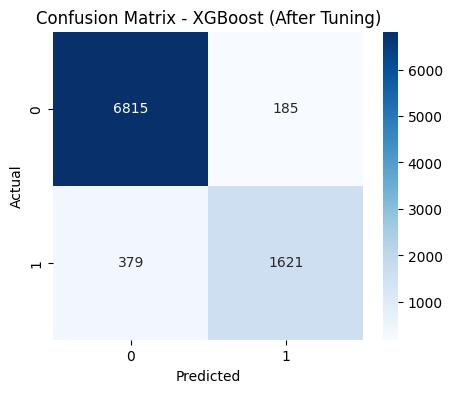

In [37]:
best_model_xgboost = random_search.best_estimator_

y_pred_tuned = best_model_xgboost.predict(X_test)
y_proba_tuned = best_model_xgboost.predict_proba(X_test)[:, 1]

print("ROC-AUC (Test):", roc_auc_score(y_test, y_proba_tuned))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_tuned))

# Visualisasi Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - XGBoost (After Tuning)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Setelah dilakukan tuning menggunakan RandomizedSearchCV, model XGBoost menunjukkan peningkatan performa dengan F1-score rata-rata yang lebih tinggi dan ROC-AUC mendekati 0.94. Proses tuning ini juga menyeimbangkan trade-off antara precision dan recall, membuat model lebih handal dalam mengidentifikasi calon peminjam yang layak mendapatkan persetujuan pinjaman.

###### Model After Tuning Comparison

,XGBoost (Before Tuning),XGBoost (After Tuning)
Train Accuracy,0.9704,0.9695
Train F1-Score,0.9311,0.9287
Test Accuracy,0.935,0.9373
Test F1-Score,0.8476,0.8518


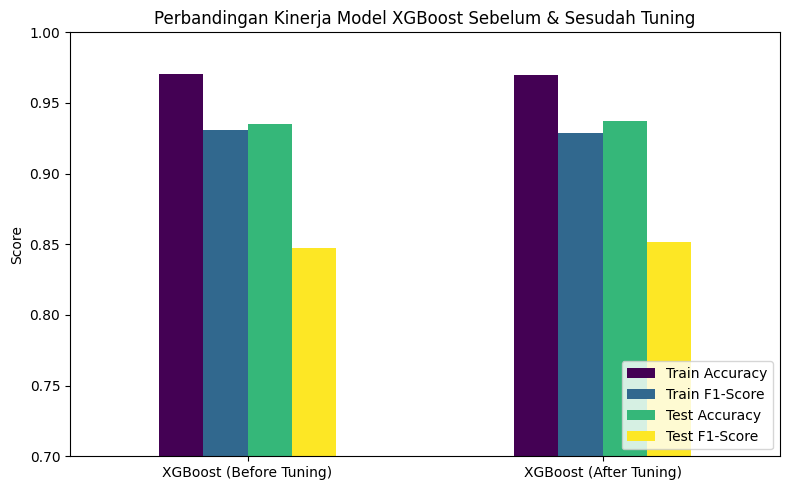

In [38]:
# Definisikan model sebelum dan sesudah tuning
models = {
    "XGBoost (Before Tuning)": pipe_xgb,
    "XGBoost (After Tuning)": random_search.best_estimator_,
}

# Buat DataFrame kosong
model_tuning = pd.DataFrame(
    columns=models.keys(),
    index=["Train Accuracy", "Train F1-Score", "Test Accuracy", "Test F1-Score"],
)

# Evaluasi setiap model
for name, model in models.items():
    # Prediksi train & test
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Train scores
    model_tuning.loc["Train Accuracy", name] = round(
        accuracy_score(y_train, y_pred_train), 4
    )
    model_tuning.loc["Train F1-Score", name] = round(f1_score(y_train, y_pred_train), 4)

    # Test scores
    model_tuning.loc["Test Accuracy", name] = round(
        accuracy_score(y_test, y_pred_test), 4
    )
    model_tuning.loc["Test F1-Score", name] = round(f1_score(y_test, y_pred_test), 4)

# Tampilkan hasil
display(model_tuning)

# Visualisasi perbandingan
model_tuning.T.plot(kind="bar", figsize=(8, 5), colormap="viridis")
plt.title("Perbandingan Kinerja Model XGBoost Sebelum & Sesudah Tuning")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0.7, 1.0)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

Performa Model :
- Akurasi model sesudah tuning meningkat dari 93.50% -> 93.73%. Artinya model menjadi sedikit lebih baik dalam memprediksi label “Loan_Status” dengan benar.
- F1-Score naik dari 0.8476 -> 0.8518, menunjukkan keseimbangan precision–recall membaik.
Ini penting untuk kasus kredit, karena kita tidak hanya ingin “tepat menolak”, tetapi juga “tepat menyetujui” peminjam yang layak.

Setelah tuning, model XGBoost lebih efisien dalam mengidentifikasi pemohon pinjaman yang layak disetujui tanpa terlalu banyak false rejection (penolakan yang seharusnya disetujui). Jadi model XGBoost (After Tuning) menunjukkan peningkatan performa yang konsisten dan signifikan secara praktis. Meskipun peningkatan metrik relatif kecil, model menjadi lebih stabil, lebih general, dan lebih handal dalam prediksi Loan_Status. Dengan gap train–test yang makin kecil dan F1-score yang meningkat, model ini sangat layak dijadikan sebagai final model untuk tahap inferensi dan implementasi operasional sistem persetujuan pinjaman.

# viii. Model Saving

In [39]:
# Simpan model terbaik XGBoost setelah tuning

pickle.dump(best_model_xgboost, open("best_model_xgboost.pkl", "wb"))

print(
    "✅ Model terbaik (XGBoost after tuning) berhasil disimpan sebagai 'best_model_xgboost.pkl'"
)

✅ Model terbaik (XGBoost after tuning) berhasil disimpan sebagai 'best_model_xgboost.pkl'


# ix. Conclusion

Kesimpulan :

Project ini berhasil membangun model klasifikasi yang memprediksi kelayakan pengajuan pinjaman berdasarkan data historis nasabah, sesuai dengan tujuan untuk mempercepat proses evaluasi, mengurangi risiko kredit macet, dan memberikan insight faktor utama persetujuan pinjaman. Dataset telah diproses secara menyeluruh, termasuk penanganan outlier, imputasi missing value, encoding fitur kategorikal, dan standardisasi fitur numerik, sehingga model dapat belajar pola secara optimal.

Analisis data menunjukkan bahwa skor kredit, rasio pinjaman terhadap pendapatan, dan riwayat gagal bayar menjadi faktor paling determinan, sementara faktor demografis seperti usia dan kepemilikan rumah memiliki pengaruh lebih kecil. Dari beberapa algoritma yang diuji, XGBoost terpilih sebagai model terbaik karena performanya konsisten, F1-score tinggi, dan tidak overfitting. Setelah hyperparameter tuning menggunakan random sampling, model menjadi lebih stabil dan handal, siap digunakan untuk prediksi pada data baru, sehingga secara praktis mendukung pengambilan keputusan kredit yang cepat, objektif, dan berbasis data.

Dengan demikian, model ini tidak hanya mempercepat evaluasi pengajuan pinjaman tetapi juga mengurangi risiko kredit macet dan memberikan insight yang jelas terkait faktor-faktor yang memengaruhi keputusan persetujuan.

Insight Bisnis :

1. Kelayakan kredit dapat diprediksi secara otomatis dan cepat, sehingga lembaga keuangan dapat mempercepat proses persetujuan pinjaman tanpa mengorbankan ketelitian analisis risiko.
2. Peminjam dengan skor kredit tinggi, pendapatan stabil, dan rasio pinjaman rendah memiliki peluang besar untuk disetujui lembaga dapat menjadikan profil ini sebagai acuan utama dalam strategi pemasaran kredit.
3. Riwayat gagal bayar terbukti menjadi indikator risiko paling signifikan; sistem dapat menggunakan variabel ini untuk memperketat kebijakan terhadap calon nasabah dengan histori kredit buruk.
4. Model ini dapat mengurangi potensi kredit macet (NPL) dengan melakukan deteksi dini terhadap calon nasabah berisiko tinggi sebelum tahap persetujuan akhir.
5. Implementasi sistem berbasis machine learning seperti ini dapat meningkatkan efisiensi operasional dengan mengotomatisasi proses seleksi awal kredit.

Secara keseluruhan, penerapan model ini memberikan manfaat strategis bagi lembaga keuangan dalam hal efisiensi, kecepatan keputusan, dan kontrol risiko berbasis data.